<a href="https://colab.research.google.com/github/JislordCodes/House_Price_Prediction_Model/blob/main/neural_network_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers

In [ ]:
df = pd.read_csv('/content/1GfvKA0qznNVknghV4botnNxyHKvODOC.txt')

In [ ]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [ ]:
dataset = df.values

In [ ]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [ ]:
X = dataset[:,0:10]

In [ ]:
Y = dataset[:,10]

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 0.6907 - accuracy: 0.5068 - val_loss: 0.6858 - val_accuracy: 0.5160
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5068 - val_loss: 0.6829 - val_accuracy: 0.5160
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5088 - val_loss: 0.6805 - val_accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5127 - val_loss: 0.6784 - val_accuracy: 0.5205
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5205 - val_loss: 0.6763 - val_accuracy: 0.5205
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5303 - val_loss: 0.6742 - val_accuracy: 0.5297
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.5352 - val_loss: 0.6721 - val_accuracy: 0.5479
Epoch 8/100
3

In [ ]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8402


0.8401826620101929

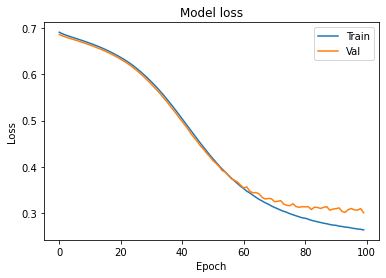

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 35ms/step - loss: 0.5021 - accuracy: 0.7524 - val_loss: 0.4657 - val_accuracy: 0.7489
Epoch 2/100
32/32 [==============================] - 1s 31ms/step - loss: 0.3404 - accuracy: 0.8591 - val_loss: 0.3417 - val_accuracy: 0.8676
Epoch 3/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2811 - accuracy: 0.8885 - val_loss: 0.3182 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 1s 45ms/step - loss: 0.2744 - accuracy: 0.8865 - val_loss: 0.3879 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2540 - accuracy: 0.8953 - val_loss: 0.2943 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2311 - accuracy: 0.9051 - val_loss: 0.3665 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 1s 28ms/step - loss: 0.2192 - accuracy: 0.9031 - val_loss: 0.4016 - val_accuracy: 0.8539
Epoch 

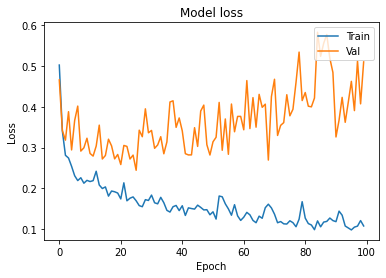

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 37ms/step - loss: 14.2682 - accuracy: 0.5783 - val_loss: 3.9434 - val_accuracy: 0.8539
Epoch 2/100
32/32 [==============================] - 1s 47ms/step - loss: 1.6720 - accuracy: 0.8405 - val_loss: 0.6637 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 1s 41ms/step - loss: 0.5884 - accuracy: 0.8474 - val_loss: 0.5016 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4848 - accuracy: 0.8875 - val_loss: 0.5287 - val_accuracy: 0.8539
Epoch 5/100
32/32 [==============================] - 1s 32ms/step - loss: 0.4669 - accuracy: 0.8855 - val_loss: 0.5078 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4821 - accuracy: 0.8748 - val_loss: 0.4939 - val_accuracy: 0.8539
Epoch 7/100
32/32 [==============================] - 1s 32ms/step - loss: 0.4711 - accuracy: 0.8806 - val_loss: 0.4769 - val_accuracy: 0.8676
Epoch

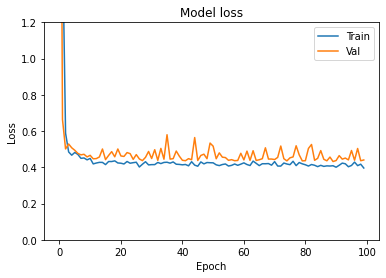

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

In [ ]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

KeyError: ignored